# GENSIM for word embeddings 

- THE GENSIM LIBRARY

    - Gensim is an open-source python library for natural language processing.

    - It was developed and is maintained by the Czech natural language processing researcher Radim Řehůřek. 

    - In the previous tutorial, we have seen how you can use this package to do topic modeling.
    
    - We also use `gensim` package to do word embedding here.

    - Gensim library will enable us to develop word embeddings by training our own word2vec models on a custom corpus either with CBOW of skip-grams algorithms.
    

- Word embeddings can be used for:
    - automated text tagging
    - recommendation engines
    - synonyms and search query expansion
    - machine translation
    - plain feature engineering

One example

<img src="01.png" alt="drawing" width="800"/>

Another example

<img src="2.png" alt="drawing" width="800"/>

What is a word embedding?
- ‘Word embedding’ = ‘word vectors’ = ‘distributed representations’
- It is a dense representation of words in a low-dimensional vector space.

## Software for word embeddings 

- Software for training and using word embeddings includes 
    - Tomas Mikolov's Word2vec, 
    - Stanford University's GloVe, GN-GloVe 
    - AllenNLP's ELMo,
    - BERT
    - fastText 
    - Gensim
    - Indra and Deeplearning4j
  
    - Principal Component Analysis (PCA) and T-Distributed Stochastic Neighbour Embedding (t-SNE) are both used to reduce the dimensionality of word vector spaces and visualize word embeddings and clusters.

## Word2vec

- Word2vec is a famous algorithm for natural language processing (NLP) created by Tomas Mikolov teams. 

- It is a group of related models that are used to produce word embeddings, i.e. CBOW and skip-grams. 

- The models are considered shallow. They consist of two-layer neural networks that are trained to reconstruct linguistic contexts of words. 

- It was a small step in machine learning but made a huge impact in NLP compared to earlier algorithms, such as latent semantic analysis.

- While skip-grams predicts context words based on input, CBOW is the reverse model of Skip-Grams. It predicts target words based on context words.


- The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. 
    - For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

- From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.

<img src="3.png" alt="drawing" width="800"/>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

## 1) CREATE A WORD2VEC MODEL

- Training the model: Gensim Word2Vec Implementation:
    - We use Gensim implementation of word2vec: https://radimrehurek.com/gensim/models/word2vec.html

In [66]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

print (common_texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


## train a simpliest word embedding by yourself

In [67]:
path = get_tmpfile("word2vec.model")
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

INFO - 14:54:53: collecting all words and their counts
INFO - 14:54:53: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 14:54:53: collected 12 word types from a corpus of 29 raw words and 9 sentences
INFO - 14:54:53: Loading a fresh vocabulary
INFO - 14:54:53: effective_min_count=1 retains 12 unique words (100% of original 12, drops 0)
INFO - 14:54:53: effective_min_count=1 leaves 29 word corpus (100% of original 29, drops 0)
INFO - 14:54:53: deleting the raw counts dictionary of 12 items
INFO - 14:54:53: sample=0.001 downsamples 12 most-common words
INFO - 14:54:53: downsampling leaves estimated 3 word corpus (12.1% of prior 29)
INFO - 14:54:53: estimated required memory for 12 words and 100 dimensions: 15600 bytes
INFO - 14:54:53: resetting layer weights
INFO - 14:54:53: training model with 4 workers on 12 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO - 14:54:53: worker thread finished; awaiting finish of 3 more threads
IN

The hyperparameters of this model:

- size: The number of dimensions of the embeddings and the default is 100.
- window: The maximum distance between a target word and words around the target word. The default window is 5.
- min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- workers: The number of partitions during training and the default workers is 3.
- sg: The training algorithm, either CBOW(0) or skip-gram (1). The default training algorithm is CBOW.

In [68]:
vector = model.wv['computer']  # numpy vector of a word
print (vector)

[-0.00031059 -0.00047937 -0.00193366  0.0001632   0.00396057 -0.00498204
  0.00479471  0.00097412 -0.00295674  0.00203741 -0.00032115 -0.00426501
  0.004509   -0.00373723  0.00327207 -0.00491623 -0.0029554  -0.00115403
 -0.00313973  0.00132406 -0.00444628  0.00344426  0.00156202 -0.00407919
 -0.00457546  0.00350944  0.00344587 -0.00492144  0.00134602  0.00112012
 -0.00317996  0.0011763   0.00000114  0.00234649 -0.00097735  0.00195786
  0.00062695  0.00226125 -0.00361166 -0.00170258  0.00304619  0.00389385
 -0.00340547 -0.0020261   0.00086331  0.00293121 -0.00354203  0.00121521
 -0.00014114 -0.00253102  0.0029823   0.00238403 -0.00074223  0.00108045
  0.00040499  0.00369383  0.00251473  0.00026273  0.00281507 -0.00115321
  0.00174617 -0.001251   -0.00216189 -0.00368334 -0.00404144 -0.00280523
  0.00020058  0.00444127  0.00232165 -0.00414378 -0.00023068  0.00234746
 -0.00026399  0.00475366  0.00345872  0.00110838 -0.00394687  0.00119322
 -0.00229989 -0.00141029 -0.00487892 -0.00093626 -0

In [69]:
# new words? cannot handle
print (model.wv(['hi']))

TypeError: 'Word2VecKeyedVectors' object is not callable

In [70]:
## save model
model.save("word2vec.model")

INFO - 14:55:23: saving Word2Vec object under word2vec.model, separately None
INFO - 14:55:23: not storing attribute vectors_norm
INFO - 14:55:23: not storing attribute cum_table
INFO - 14:55:23: saved word2vec.model


## 2) WORD EMBEDDING Using a Real Dataset

In this example, I use a  dataset from Kaggle Dataset( https://www.kaggle.com/CooperUnion/cardataset) This cars dataset includes features such as make, model, year, engine, and other properties of the car. We will use these features to generate the word embeddings for each make model and then compare the similarities between different make model. The following dataframe shows the detail information of this dataset.

In [48]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### PRE-PROCESS WORDS

- Cleaning 
    - Removing the missing values;
    - Lemmatizing;
    - Removing the stopwords;
    - Removes non-alphabetic characters: regular expression;
    - Bigrams: We can use Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences. https://radimrehurek.com/gensim/models/phrases.html

         ```python
         from gensim.models.phrases import Phrases, Phraser
         ```
         - As Phrases() takes a list of list of words as input:
        ```python
        sent = [row.split() for row in df_clean['clean']]
        ```


Since the purpose of this tutorial is to learn how to generate word embeddings using genism library, I will not do the EDA and feature selection for the word2vec model for the sake of simplicity. 
<br> 
Genism word2Vec requires that a format of list of list for training where every document is contained in a list and every list contains list of tokens of that document. At first, we need to generate a format of list of list for training the make model word embedding. To be more specific, each make model is contained in a list and every list contains list of features of that make model.

To achieve these, we need to do the following data preprocessing steps:

1. Create a new column for Make Model 
2. Generate a format of list of list for each Make Model with the following features: Engine Fuel Type, Transmission Type, Driven_Wheels, Market Category, Vehicle Size and Vehicle Style. 


1. Create a new column for Make Model

In [71]:
df['Maker_Model']= df['Make']+ " " + df['Model']

2. Generate a format of list of list for each Make Model 

In [72]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1) 
# Store them in the pandas dataframe
df_clean = pd.DataFrame({'clean': df2}) 
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2] 

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

### Genism word2vec Model Training 

In [73]:
## Train the genisim word2vec model with our own custom corpus
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

WARNING - 14:56:14: consider setting layer size to a multiple of 4 for greater performance
INFO - 14:56:14: collecting all words and their counts
INFO - 14:56:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 14:56:14: PROGRESS: at sentence #10000, processed 74060 words, keeping 841 word types
INFO - 14:56:14: collected 977 word types from a corpus of 88129 raw words and 11914 sentences
INFO - 14:56:14: Loading a fresh vocabulary
INFO - 14:56:14: effective_min_count=1 retains 977 unique words (100% of original 977, drops 0)
INFO - 14:56:14: effective_min_count=1 leaves 88129 word corpus (100% of original 88129, drops 0)
INFO - 14:56:14: deleting the raw counts dictionary of 977 items
INFO - 14:56:14: sample=0.001 downsamples 35 most-common words
INFO - 14:56:14: downsampling leaves estimated 29996 word corpus (34.0% of prior 88129)
INFO - 14:56:14: estimated required memory for 977 words and 50 dimensions: 879300 bytes
INFO - 14:56:14: resetting layer weights

In [74]:
## We can obtain the word embedding directly from the training model
model['Toyota Camry']

array([-0.10365821, -0.03834468, -0.09854577, -0.08499372, -0.04166123,
        0.08490819, -0.02679554, -0.1329035 , -0.06970573, -0.3010772 ,
        0.03514205,  0.14641401, -0.1904866 ,  0.15030791, -0.04365537,
        0.03625378, -0.0388467 ,  0.04706321, -0.04965301, -0.1043864 ,
        0.12221095,  0.18493368,  0.00907104, -0.08848903,  0.11872905,
        0.01716448, -0.15960366, -0.16130216, -0.30773667, -0.272634  ,
       -0.03958499, -0.007336  ,  0.05693236, -0.06150442,  0.1590475 ,
        0.1775071 ,  0.3102137 ,  0.0031547 ,  0.08919477,  0.09501619,
        0.12213099,  0.06135909,  0.22057548,  0.08365135,  0.15436625,
        0.10553859,  0.08309863,  0.11538124, -0.12137548,  0.11420659],
      dtype=float32)

### Compare Similarities 

Now we could even use Word2vec to compute similarity between two make model in the vocabulary by invoking the model.similarity() and passing in the relvevant words. For instance,  model.similarity('Porsche 718 Cayman', 'Nissan Van') This will give us the Euclidian similarity between Porsche 718 Cayman and Nissan Van. 

In [77]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

0.8714705

In [78]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.9876421

From the above example, we can tell that Porsche 718 Cayman is more similar with Mercedes-Benz SLK-Class than Nissan Van. We also can use the build in function model.most_similar() to get a set of the most similar make models for a given make model.

In [79]:
## Show the most similar vehicles for Mercedes-Benz SLK-Class : Default by eculidean distance 
model.most_similar('Mercedes-Benz SLK-Class')[:5]

INFO - 14:56:32: precomputing L2-norms of word weight vectors


[('Subaru BRZ', 0.9961400628089905),
 ('Toyota MR2 Spyder', 0.9955236911773682),
 ('Mercedes-Benz SL-Class', 0.9954379796981812),
 ('Chrysler Crossfire', 0.9952895641326904),
 ('Scion FR-S', 0.9948042631149292)]

In [80]:
## Show the most similar vehicles for Toyota Camry : Default by eculidean distance 
model.most_similar('Toyota Camry')[:5]

[('Nissan Sentra', 0.994681179523468),
 ('Nissan Altima', 0.9933871030807495),
 ('Mitsubishi Galant', 0.9922041296958923),
 ('Pontiac 6000', 0.9917990565299988),
 ('Buick Verano', 0.9901615381240845)]

However, Euclidian similarity cannot work well for the high-dimensional word vectors, This is because Euclidian similarity will increase the number of dimensions increases even if the word embedding stands for different meanings. Alternatively, we can use cosine similarity to measure the similarity between two vectors.  Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. Therefore, the cosine similarity captures the angle of the word vectors and not the magnitude. Under cosine similarity, no similarity is expressed as a 90-degree angle while the total similarity of 1 is at 0 degree angle. The following function shows how can we generate the most similar make model based on cosine similarity.

In [81]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [59]:
Maker_Model = list(df.Maker_Model.unique()) ## only get the unique Maker_Model_Year
## Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance (model,'Mercedes-Benz SLK-Class',Maker_Model,5) 

[('Mercedes-Benz SL-Class', 0.9957114),
 ('Ford Shelby GT500', 0.99425447),
 ('Audi S5', 0.99422264),
 ('Nissan GT-R', 0.99412173),
 ('Mercedes-Benz SLS AMG GT', 0.9940822)]

### T-SNE Plot

It’s hard to visualize the word embedding directly, for they usually has more than 3 dimensions. T-SNE is an useful tool to visualize high-dimensional data by reducing dimensional space while keeping relative pairwise distance between points. It can be said that t-SNE looking for a new data representation where the neighborhood relations are preserved. In this tutorial, I used TSNE package from scikit-learn library. The following code showed how to plot the word embedding with T-SNE plot. 

In [82]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<IPython.core.display.Javascript object>


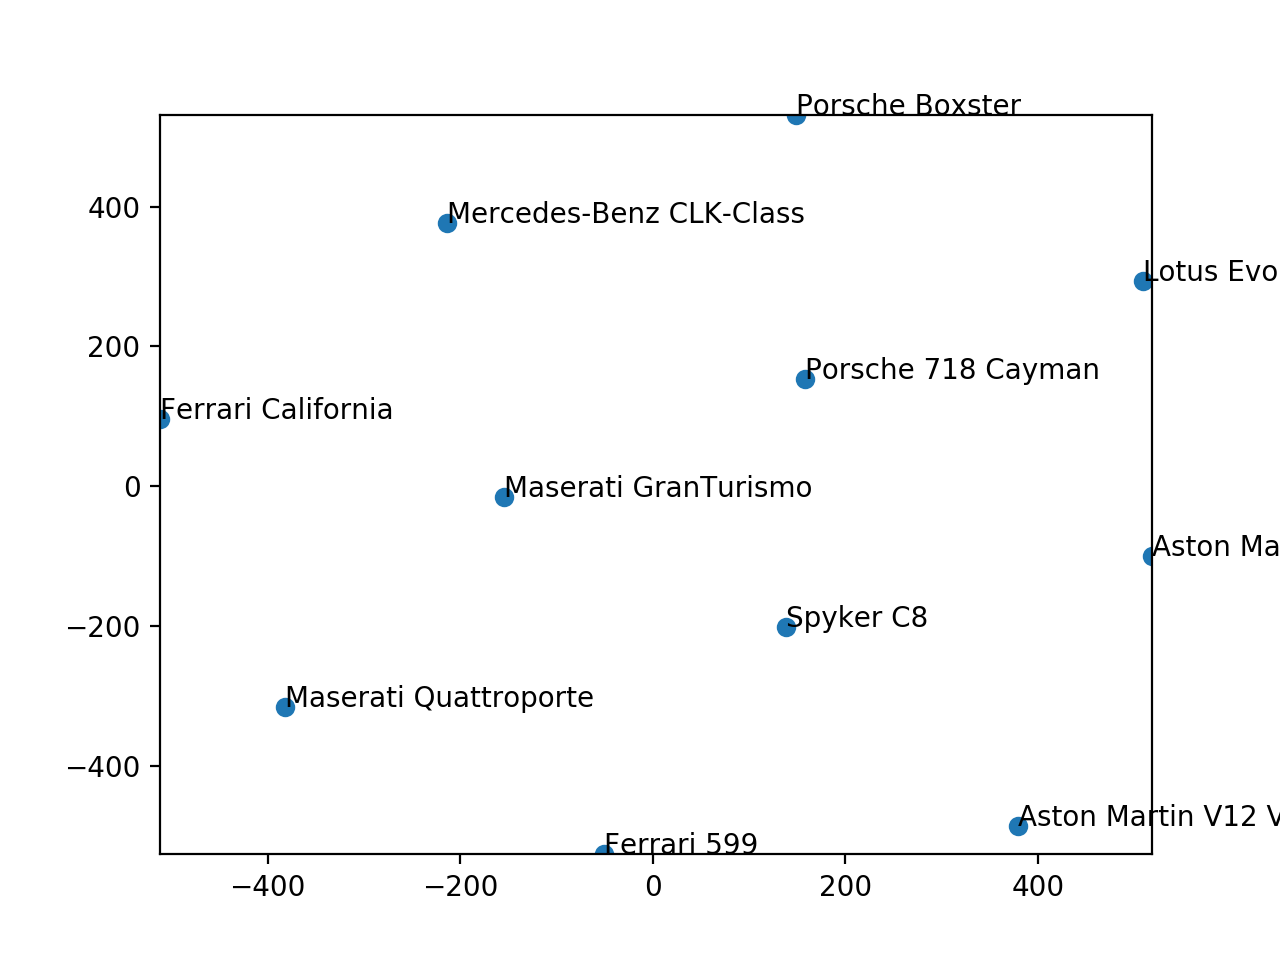

In [61]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50)

# 3) Read pre-trained models

As we said, it's usually far more better to use some pre-trained embeddings instead of starting from scratches

Read it more here

https://radimrehurek.com/gensim/models/keyedvectors.html


I will read GloVe's pre-trained vectors here. Gensim offers download of some other pre-trained vectors. See it here
https://github.com/RaRe-Technologies/gensim-data


And a more complete pre-trained vector dataset can be found here
http://vectors.nlpl.eu/repository/

You may need to manually download them to your disk and let Gensim read in.


Another source for Pre-trainned word and phrase vectors from Google: https://code.google.com/archive/p/word2vec/

In [5]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data


[==================================================] 100.0% 128.1/128.1MB downloaded


Then we can find similar words

In [7]:
result = word_vectors.most_similar(positive=['woman'])
print (result)

[('girl', 0.847267210483551), ('man', 0.832349419593811), ('mother', 0.827568769454956), ('boy', 0.7720510959625244), ('she', 0.7632068395614624), ('child', 0.7601762413978577), ('wife', 0.7505022287368774), ('her', 0.7445706129074097), ('herself', 0.7426273822784424), ('daughter', 0.7264456748962402)]


As you may observe, girl and man are really different things. So we can use the king/queen and man/women analogy to find what's the similar word to "woman", if we hope to find pairs such as (king, queen)


In [83]:
result = word_vectors.most_similar(positive=[ 'king', 'woman'], negative=['queen'])
print (result)

[('man', 0.7907768487930298), ('father', 0.722454309463501), ('son', 0.7012036442756653), ('boy', 0.6988654732704163), ('another', 0.6853840351104736), ('person', 0.6754911541938782), ('who', 0.6728038191795349), ('brother', 0.6645877957344055), ('mother', 0.6613163948059082), ('one', 0.6554157733917236)]


In [25]:
result = word_vectors.most_similar(positive=[ 'king', 'woman'], negative=['man'])
print (result)

[('queen', 0.7698541283607483), ('monarch', 0.6843380928039551), ('throne', 0.6755735874176025), ('daughter', 0.6594556570053101), ('princess', 0.6520534753799438), ('prince', 0.6517034769058228), ('elizabeth', 0.6464517712593079), ('mother', 0.6311717629432678), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


### Using GoogleNews-vectors-negative300.bin.gz  as an example

In [13]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [34]:
import gensim
from gensim import models
from gensim.models import Word2Vec

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
model_google = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,limit= 100000) 

In [35]:
dog = model_google['dog']
print(dog.shape)
print(dog[:10])

(300,)
[ 0.05126953 -0.02233887 -0.17285156  0.16113281 -0.08447266  0.05737305
  0.05859375 -0.08251953 -0.01538086 -0.06347656]


In [37]:
# Deal with an out of dictionary word: Михаил (Michail)
if 'Михаил' in model_google:
    print(model_google['Михаил'].shape)
else:
    print('{0} is an out of dictionary word'.format('Михаил'))

Михаил is an out of dictionary word


In [36]:
# Some predefined functions that show content related information for given words
print(model_google.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454), ('royal_palace', 0.5087165832519531)]


In [39]:
vec = model_google['king'] - model_google['man'] + model_google['woman']
model_google.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.6454660892486572),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('queens', 0.5289887189865112),
 ('ruler', 0.5247419476509094)]

In [40]:
vec = model_google['Germany'] - model_google['Berlin'] + model_google['China']
model_google.most_similar([vec])

[('China', 0.8032620549201965),
 ('Taiwan', 0.5897805690765381),
 ('South_Korea', 0.5829900503158569),
 ('Japan', 0.5828443765640259),
 ('Chinese', 0.568378210067749),
 ('India', 0.5537249445915222),
 ('United_States', 0.5330391526222229),
 ('Malaysia', 0.5230637788772583),
 ('Korea', 0.5204846858978271),
 ('Indonesia', 0.510189414024353)]

In [41]:
vec = model_google['Germany'] - model_google['Berlin'] + model_google['Beijing']
model_google.most_similar([vec])

[('China', 0.7808266878128052),
 ('Beijing', 0.7486750483512878),
 ('Chinese', 0.6215003132820129),
 ('Taiwan', 0.6076850891113281),
 ('Guangzhou', 0.5951666235923767),
 ('South_Korea', 0.5853777527809143),
 ('Guangdong', 0.557560384273529),
 ('Tianjin', 0.5540564060211182),
 ('Hong_Kong', 0.5525559186935425),
 ('Hangzhou', 0.5507876873016357)]

In [43]:
vec = model_google['Messi'] - model_google['football'] + model_google['tennis']
model_google.most_similar([vec])

[('Messi', 0.7960925102233887),
 ('Lionel_Messi', 0.7120644450187683),
 ('Nadal', 0.6976751089096069),
 ('Del_Potro', 0.6955868005752563),
 ('Xavi', 0.6640554666519165),
 ('Federer', 0.6603957414627075),
 ('Ronaldinho', 0.6550597548484802),
 ('Safin', 0.6450799703598022),
 ('Iniesta', 0.642850935459137),
 ('Wawrinka', 0.6388971209526062)]

In [44]:
print(model_google.doesnt_match("breakfast economics dinner lunch".split()))

economics


/Users/wenweipeng/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [15]:
print(model.similarity('woman', 'man'))

0.76640123


In [19]:
print(model.similarity('HKUST', 'HKU'))

0.61556727


In [21]:
print(model.similarity('Economics', 'Econometrics'))

0.4961321


In [22]:
print(model.similarity('Economics', 'Sociology'))

0.5652766


In [23]:
print(model.similarity('Statistics', 'Econometrics'))

0.254204


# Software 
- GloVe: https://nlp.stanford.edu/projects/glove/
- Word2Vec: https://code.google.com/archive/p/word2vec/
- Tensorflow Word2Vec tutorial: https://www.tensorflow.org/tutorials/text/word_embeddings
- Interactive demo: http://bionlp-www.utu.fi/wv_demo/